In [1]:
%matplotlib notebook
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress
import time

# Files to Load
file1_to_load = "Resources/us_states.csv"
file2_to_load = "Resources/Anxiety_data.csv"

# Read CSV Files and store into Pandas data frames
covid_data = pd.read_csv(file1_to_load)
anxiety_data = pd.read_csv(file2_to_load)

#Display DataFrames for Covid and Anxiety data
display('Covid Data:', covid_data.head())
display('Anxiety Data:',anxiety_data.head())


'Covid Data:'

,date,state,fips,cases,deaths
0,1/21/2020,Washington,53,1,0
1,1/22/2020,Washington,53,1,0
2,1/23/2020,Washington,53,1,0
3,1/24/2020,Illinois,17,1,0
4,1/24/2020,Washington,53,1,0


'Anxiety Data:'

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,23.2,21.5,25.0,21.5 - 25.0,NaN


In [2]:
del covid_data['fips']
covid_data

,date,state,cases,deaths
0,1/21/2020,Washington,1,0
1,1/22/2020,Washington,1,0
2,1/23/2020,Washington,1,0
3,1/24/2020,Illinois,1,0
4,1/24/2020,Washington,1,0
...,...,...,...,...
23054,4/25/2021,Virginia,654210,10691
23055,4/25/2021,Washington,397006,5478
23056,4/25/2021,West Virginia,151382,2821
23057,4/25/2021,Wisconsin,656668,7473


In [3]:
del anxiety_data['Group']
del anxiety_data['Subgroup']
del anxiety_data['Phase']
del anxiety_data['Time Period']
del anxiety_data['Time Period Label']
del anxiety_data['Time Period End Date']
del anxiety_data['Low CI']
del anxiety_data['High CI']
del anxiety_data['Confidence Interval']
del anxiety_data['Quartile Range']

#change the date format of anxiety_data to match covid_data's
anxiety_data['Time Period Start Date'] = anxiety_data['Time Period Start Date'].apply(lambda dateStr:dateStr.split()[0])

#change column names to assist merge and be meaningful
anxiety_data_renamed = anxiety_data.rename(columns={'State':'state',"Indicator":"mental disorder","Value":"frequency of mental disorder","Time Period Start Date":"date"})
anxiety_data_renamed

,mental disorder,state,date,frequency of mental disorder
0,Symptoms of Depressive Disorder,United States,4/23/2020,23.5
1,Symptoms of Depressive Disorder,United States,4/23/2020,32.7
2,Symptoms of Depressive Disorder,United States,4/23/2020,25.7
3,Symptoms of Depressive Disorder,United States,4/23/2020,24.8
4,Symptoms of Depressive Disorder,United States,4/23/2020,23.2
...,...,...,...,...
5779,Symptoms of Anxiety Disorder or Depressive Dis...,Virginia,3/17/2021,31.4
5780,Symptoms of Anxiety Disorder or Depressive Dis...,Washington,3/17/2021,35.6
5781,Symptoms of Anxiety Disorder or Depressive Dis...,West Virginia,3/17/2021,41.0
5782,Symptoms of Anxiety Disorder or Depressive Dis...,Wisconsin,3/17/2021,32.3


In [4]:
#merge data based on states
merged_data = covid_data.merge(anxiety_data_renamed,how="inner", on = ["state","date"])
#create csv data of merged
merged_data.to_csv("Resources/merged_data.csv")
#display merged data
display(merged_data)


,date,state,cases,deaths,mental disorder,frequency of mental disorder
0,4/23/2020,Alabama,5832,197,Symptoms of Depressive Disorder,18.6
1,4/23/2020,Alabama,5832,197,Symptoms of Anxiety Disorder,25.6
2,4/23/2020,Alabama,5832,197,Symptoms of Anxiety Disorder or Depressive Dis...,30.3
3,4/23/2020,Alaska,335,7,Symptoms of Depressive Disorder,19.2
4,4/23/2020,Alaska,335,7,Symptoms of Anxiety Disorder,27.7
...,...,...,...,...,...,...
4126,3/17/2021,Wisconsin,627266,7203,Symptoms of Anxiety Disorder,25.9
4127,3/17/2021,Wisconsin,627266,7203,Symptoms of Anxiety Disorder or Depressive Dis...,32.3
4128,3/17/2021,Wyoming,55449,693,Symptoms of Depressive Disorder,24.2
4129,3/17/2021,Wyoming,55449,693,Symptoms of Anxiety Disorder,30.1


In [5]:
# Data Analysis 
# Frequency table by mental disorder
covid_tiny_group1 = merged_data.groupby("mental disorder")
covid_tiny_group1

# total number of cases, deaths, and frequency of mental disorder by mental disorder
total_cases_mental_disorder = covid_tiny_group1["cases"].mean().map("{:,.0f}".format)
total_deaths_mental_disorder = covid_tiny_group1["deaths"].mean().map("{:,.0f}".format)
total_frequency_mental_disorder = covid_tiny_group1["frequency of mental disorder"].mean().map("{:,.1f}".format)
total_cases_mental_disorder
total_deaths_mental_disorder
total_frequency_mental_disorder

# Display the results in a dataframe 
covid_tiny_group_mental_disorder_results = pd.DataFrame({"Average of Cases": total_cases_mental_disorder,"Average of Deaths":total_deaths_mental_disorder,
                                        "Average Frequency of Mental Disorder": total_frequency_mental_disorder})
covid_tiny_group_mental_disorder_results

,Average of Cases,Average of Deaths,Average Frequency of Mental Disorder
mental disorder,,,
Symptoms of Anxiety Disorder,"191,414","4,369",32.1
Symptoms of Anxiety Disorder or Depressive Disorder,"191,414","4,369",37.0
Symptoms of Depressive Disorder,"191,414","4,369",25.6


In [6]:
# create a new lists with cases, deaths, and frequency of mental disorder columns
cases_column = merged_data["cases"].to_list()
deaths_column = merged_data["deaths"].to_list()
frequency_column =merged_data["frequency of mental disorder"].to_list()

# tuple from the above lists
new_covid_tiny = list(zip(cases_column,deaths_column,frequency_column))

# create a new dataframe to describe the numerical variables
new_covid_tiny_df = pd.DataFrame(new_covid_tiny, columns=["cases", "deaths", "Frequency of Mental Disorder"])
round(new_covid_tiny_df.describe(),2)

,cases,deaths,Frequency of Mental Disorder
count,4131.00,4131.00,4131.00
mean,191414.42,4368.86,31.56
std,365537.50,7356.73,6.45
min,335.00,7.00,14.30
25%,15053.00,414.00,26.80
50%,60820.00,1512.00,31.50
75%,202182.00,5004.00,36.20
max,3631735.00,56952.00,52.30


,date,state,cases,deaths,mental disorder,frequency of mental disorder
30,4/23/2020,Georgia,20905,871,Symptoms of Depressive Disorder,25.6
31,4/23/2020,Georgia,20905,871,Symptoms of Anxiety Disorder,31.9
32,4/23/2020,Georgia,20905,871,Symptoms of Anxiety Disorder or Depressive Dis...,36.2
183,5/7/2020,Georgia,30524,1332,Symptoms of Depressive Disorder,25.6
184,5/7/2020,Georgia,30524,1332,Symptoms of Anxiety Disorder,29.5
...,...,...,...,...,...,...
3856,3/3/2021,Georgia,989698,17079,Symptoms of Anxiety Disorder,27.1
3857,3/3/2021,Georgia,989698,17079,Symptoms of Anxiety Disorder or Depressive Dis...,33.2
4008,3/17/2021,Georgia,1013340,17801,Symptoms of Depressive Disorder,25.1
4009,3/17/2021,Georgia,1013340,17801,Symptoms of Anxiety Disorder,34.0


,cases,deaths,average frequency of mental disorder
date,,,
4/23/2020,20905,871,31.2
5/7/2020,30524,1332,29.8
5/14/2020,34422,1521,28.7
5/21/2020,38969,1749,32.6
5/28/2020,43363,1942,30.4
6/4/2020,47528,2116,31.3
6/11/2020,52332,2337,32.0
6/18/2020,58040,2565,32.3
6/25/2020,67796,2704,36.4


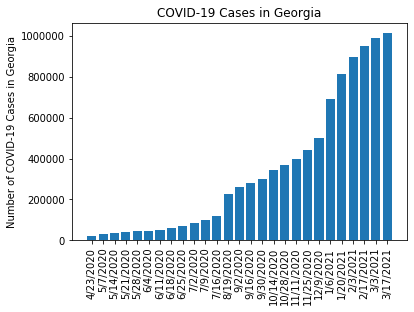

In [7]:
#Question: How has Georgia been impacted?
#get georgia data
georgia_data=merged_data.loc[merged_data["state"]=="Georgia"]
#display georgia data
display(georgia_data)
#group georgia data by date
georgia_data_group_by_date=georgia_data.groupby(["date"],sort=False)
#get the mean
georgia_data_group_by_date_mean=georgia_data_group_by_date.mean()
#rename "frequency of mental disorder" to "average frequency disorder"
georgia_data_group_by_date_mean=georgia_data_group_by_date_mean.rename(columns={"frequency of mental disorder":"average frequency of mental disorder"})
#round mean data to 1 after decimal point and display mean data
display(round(georgia_data_group_by_date_mean,1))
#get the date array
date=merged_data["date"].unique()
#assign data
a=date
b=georgia_data_group_by_date_mean["cases"]
c=georgia_data_group_by_date_mean["deaths"]
d=georgia_data_group_by_date_mean["average frequency of mental disorder"]

#plot the bar figure of COVID-19 cases in Georgia
plt.bar(a,b)
plt.xticks(rotation=90)
#set the title
plt.title("COVID-19 Cases in Georgia")
#set the y label
plt.ylabel("Number of COVID-19 Cases in Georgia")
#save the png image
plt.savefig("Images/COVID-19 Cases in Georgia.png",bbox_inches="tight")


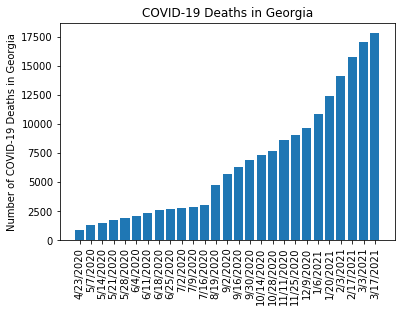

In [8]:
#plot the bar figure of COVID-19 cases in Georgia
plt.bar(a,c)
plt.xticks(rotation=90)
#set the title
plt.title("COVID-19 Deaths in Georgia")
#set the y label
plt.ylabel("Number of COVID-19 Deaths in Georgia")
#save the png image
plt.savefig("Images/COVID-19 Deaths in Georgia.png",bbox_inches="tight")

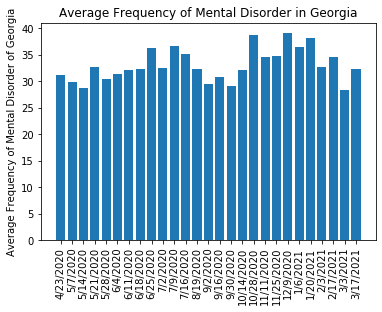

In [9]:
#plot the bar figure of COVID-19 cases in Georgia
plt.bar(a,d)
plt.xticks(rotation=90)
#set the title
plt.title("Average Frequency of Mental Disorder in Georgia")
#set the y label
plt.ylabel("Average Frequency of Mental Disorder of Georgia")
#save the png image
plt.savefig("Images/Average Frequency of Mental Disorder in Georgia.png",bbox_inches="tight")

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


The r value is 0.04.


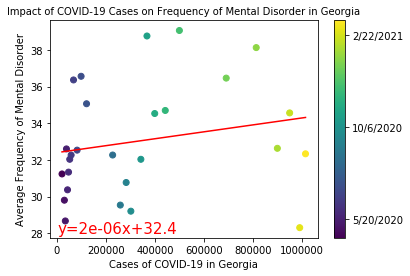

In [11]:
from datetime import datetime as dt,timedelta
#set date from object type to datetime type
georgia_data["date"]=pd.to_datetime(georgia_data["date"])
#assign data
b=georgia_data_group_by_date_mean["cases"]
c=georgia_data_group_by_date_mean["deaths"]
d=georgia_data_group_by_date_mean["average frequency of mental disorder"]
georgiadate=georgia_data["date"].unique().tolist()
#scatter plot COVID-19 deaths and frequency of mental disorder
#set georgiadate as colorbar
plt.scatter(b,d,c=georgiadate)
clb=plt.colorbar()
#set colorbar tick location
tick_locations=(1590000000000000000,1602000000000000000,1614000000000000000)
clb.set_ticks(ticks=tick_locations,update_ticks=True)
#set colorbar tick labels
clb.set_ticklabels(ticklabels=["5/20/2020","10/6/2020","2/22/2021"],update_ticks=True)
#line regression model
(slope,intercept,rvalue,pvalue,stderr)=linregress(b,d)
regress_values=b*slope+intercept
line_eq="y="+str(round(slope,6))+"x+"+str(round(intercept,2))
plt.plot(b,regress_values,"r-")
plt.annotate(line_eq,(1800,28),fontsize=15,color="red")
#set the title
plt.title("Impact of COVID-19 Cases on Frequency of Mental Disorder in Georgia",fontsize=10)
#set the x label
plt.xlabel("Cases of COVID-19 in Georgia")
#set the y label
plt.ylabel("Average Frequency of Mental Disorder")
#print the r value
print(f"The r value is {round(rvalue**2,2)}.")
#save the png image
plt.savefig("Images/Impact of COVID-19 Cases on Frequency of Mental Disorder in Georgia.png")

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The r value is 0.04.


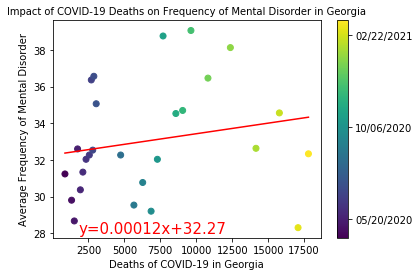

In [12]:
#set date from object type to datetime type
georgia_data["date"]=pd.to_datetime(georgia_data["date"])
#assign data
b=georgia_data_group_by_date_mean["cases"]
c=georgia_data_group_by_date_mean["deaths"]
d=georgia_data_group_by_date_mean["average frequency of mental disorder"]
georgiadate=georgia_data["date"].unique().tolist()

#scatter plot COVID-19 deaths and frequency of mental disorder
#set georgiadate as colorbar
plt.scatter(c,d,c=georgiadate)
clb=plt.colorbar()
#set colorbar tick location
tick_locations=(1590000000000000000,1602000000000000000,1614000000000000000)
clb.set_ticks(ticks=tick_locations,update_ticks=True)
#set colorbar tick labels
clb.set_ticklabels(ticklabels=["05/20/2020","10/06/2020","02/22/2021"],update_ticks=True)
#line regression model
(slope,intercept,rvalue,pvalue,stderr)=linregress(c,d)
regress_values=c*slope+intercept
line_eq="y="+str(round(slope,5))+"x+"+str(round(intercept,2))
plt.plot(c,regress_values,"r-")
plt.annotate(line_eq,(1800,28),fontsize=15,color="red")
#set the title
plt.title("Impact of COVID-19 Deaths on Frequency of Mental Disorder in Georgia",fontsize=10)
#set the x label
plt.xlabel("Deaths of COVID-19 in Georgia")
#set the y label
plt.ylabel("Average Frequency of Mental Disorder")
#print the r value
print(f"The r value is {round(rvalue**2,2)}.")
#save the png image
plt.savefig("Images/Impact of COVID-19 Deaths on Frequency of Mental Disorder in Georgia.png")

,date,cases,deaths,frequency of depressive disorder,frequency of anxiety disorder,frequency of depressive or anxiety disorder
31,2020-04-23,20905,871,25.6,31.9,36.2
184,2020-05-07,30524,1332,25.6,29.5,34.3
337,2020-05-14,34422,1521,24.8,27.6,33.6
490,2020-05-21,38969,1749,27.7,32.6,37.5
643,2020-05-28,43363,1942,24.5,31.7,34.9
796,2020-06-04,47528,2116,25.6,32.7,35.7
949,2020-06-11,52332,2337,25.7,33.3,37.1
1102,2020-06-18,58040,2565,27.9,32.6,36.3
1255,2020-06-25,67796,2704,31.4,36.8,40.9
1408,2020-07-02,82475,2801,27.1,32.5,38.0


/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


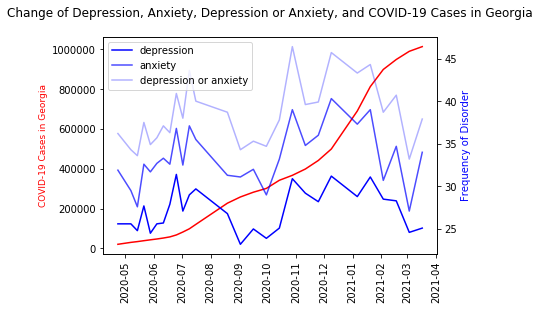

<Figure size 432x288 with 0 Axes>

In [13]:
#get georgia depression data
georgia_depression_data=georgia_data.loc[(georgia_data["mental disorder"]=="Symptoms of Depressive Disorder")]
#get georgia anxiety data
georgia_anxiety_data=georgia_data.loc[(georgia_data["mental disorder"]=="Symptoms of Anxiety Disorder")]
#get georgia depression or anxiety data
georgia_depression_or_anxiety_data=georgia_data.loc[(georgia_data["mental disorder"]=="Symptoms of Anxiety Disorder or Depressive Disorder")]
#get frequency of depression
depressioncases=georgia_depression_data["frequency of mental disorder"]
#get frequency of anxiety
anxietycases=georgia_anxiety_data["frequency of mental disorder"]
#get frequency of depreesion or anxiety
depression_or_anxiety_cases=georgia_depression_or_anxiety_data["frequency of mental disorder"]
#create new dataframe of georgia mental disorder
georgia_mental_disorder=pd.DataFrame({"date":georgia_anxiety_data["date"],"cases":georgia_anxiety_data["cases"],"deaths":georgia_anxiety_data["deaths"]})
#add frequency of depression
georgia_mental_disorder["frequency of depressive disorder"]=depressioncases.tolist()
#add frequency of anxiety
georgia_mental_disorder["frequency of anxiety disorder"]=anxietycases.tolist()
#add frequency of depression or anxiety
georgia_mental_disorder["frequency of depressive or anxiety disorder"]=depression_or_anxiety_cases.tolist()
#display georgia mental disorder data
display(georgia_mental_disorder)
#assign data
e=georgia_mental_disorder["date"]
f=georgia_mental_disorder["cases"]
g=georgia_mental_disorder["deaths"]
h=georgia_mental_disorder["frequency of depressive disorder"]
i=georgia_mental_disorder["frequency of anxiety disorder"]
j=georgia_mental_disorder["frequency of depressive or anxiety disorder"]

#set plot
fig,ax=plt.subplots()
#create line plot of covid cases vs date
ax.plot(e,f,color="red")
#set x ticks vertical
plt.xticks(rotation=90)
#set y label
ax.set_ylabel("COVID-19 Cases in Georgia",color="red",fontsize=9)
#add second plot
ax2=ax.twinx()
#add depression line in second plot
depression,=ax2.plot(e,h,color="blue")
#set second y label
ax2.set_ylabel("Frequency of Disorder",color="blue")
#add anxiety line
anxiety,=ax2.plot(e,i,color="blue",alpha=0.7)
#add depreesion_or_anxiety line
depression_or_anxiety,=ax2.plot(e,j,color="blue",alpha=0.3)
#set legend
ax2.legend([depression,anxiety,depression_or_anxiety],labels=["depression","anxiety","depression or anxiety"],loc="best")
#set plot title
plt.title("Change of Depression, Anxiety, Depression or Anxiety, and COVID-19 Cases in Georgia",pad=20)
#save image
plt.savefig("Images/Change of Depression, Anxiety, Depression or Anxiety, and COVID-19 Cases in Georgia.png",bbox_inches="tight")
plt.show()
plt.tight_layout()

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


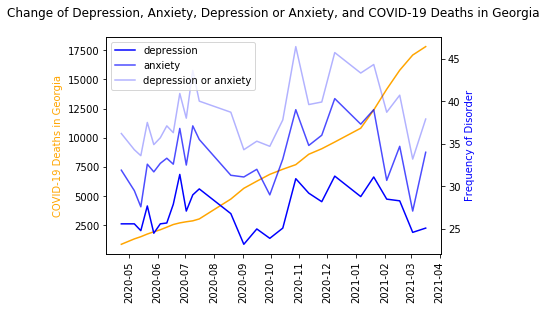

In [14]:
#set plot
fig,ax=plt.subplots()
#set line plot of covid deaths vs date
ax.plot(e,g,color="orange")
#set x ticks vertical
plt.xticks(rotation=90)
#set y label
ax.set_ylabel("COVID-19 Deaths in Georgia",color="orange")
#add second plot
ax2=ax.twinx()
#add depression line in second plot
depression,=ax2.plot(e,h,color="blue")
#set second y label
ax2.set_ylabel("Frequency of Disorder",color="blue")
#add anxiety line in second plot
anxiety,=ax2.plot(e,i,color="blue",alpha=0.7)
#add depression_or_anxiety line
depression_or_anxiety,=ax2.plot(e,j,color="blue",alpha=0.3)
#set legend
ax2.legend([depression,anxiety,depression_or_anxiety],labels=["depression","anxiety","depression or anxiety"],loc="best")
#set plot title
plt.title("Change of Depression, Anxiety, Depression or Anxiety, and COVID-19 Deaths in Georgia",pad=20)
#save image
plt.savefig("Images/Change of Depression, Anxiety, Depression or Anxiety, and COVID-19 Deaths in Georgia.png",bbox_inches="tight")
plt.show()

In [15]:
#Three observations based on Georgia data
#1.From March 2020 to April 2021, the Covid-19 cases and deaths increased with the time passed.
#2.The frequency of mental disorder did not change much during this period. Their correlations with covid-19 cases or deaths are weak.
#3.The frequency of depression, anxiety, and depression or anxiety have similar change pattern. They all decreased from July of 2020 to the bottom in October of 2020, then increased again from that timepoint.

In [16]:
mean_cases = merged_data.groupby('state').mean()["cases"]
mean_deaths = merged_data.groupby('state').mean()["deaths"]
mean_mental_disorder=merged_data.groupby('state').mean()["frequency of mental disorder"]
mean_mental_disorder

summary_stats_df = pd.DataFrame({"Cases": mean_cases, "Deaths":mean_deaths, "Anxiety":mean_mental_disorder})
summary_stats_df

,Cases,Deaths,Anxiety
state,,,
Alabama,1.739869e+05,3081.555556,32.496296
Alaska,1.789378e+04,86.259259,31.638272
Arizona,2.708545e+05,5512.000000,33.493827
Arkansas,1.061795e+05,1719.148148,34.324691
California,1.112002e+06,17291.148148,34.827160
Colorado,1.413653e+05,2698.222222,32.427160
Connecticut,1.005303e+05,4809.777778,31.117284
Delaware,3.003611e+04,665.481481,29.080247
District of Columbia,1.782200e+04,622.555556,32.238272


In [17]:
summary_stats_df.reset_index(inplace=True)

          state          Cases        Deaths    Anxiety
42    Tennessee  253641.740741   3404.703704  32.632099
13     Illinois  443956.703704  10606.518519  32.427160
49    Wisconsin  212937.814815   2400.481481  27.592593
24  Mississippi  107451.629630   2767.629630  36.120988
0       Alabama  173986.925926   3081.555556  32.496296
30   New Jersey  311223.296296  15704.000000  32.035802
9       Florida  696438.518519  12442.814815  33.549383
23    Minnesota  168347.629630   2726.444444  27.083951
17     Kentucky  122408.814815   1630.555556  33.938272
47   Washington  120976.777778   2326.259259  32.939506


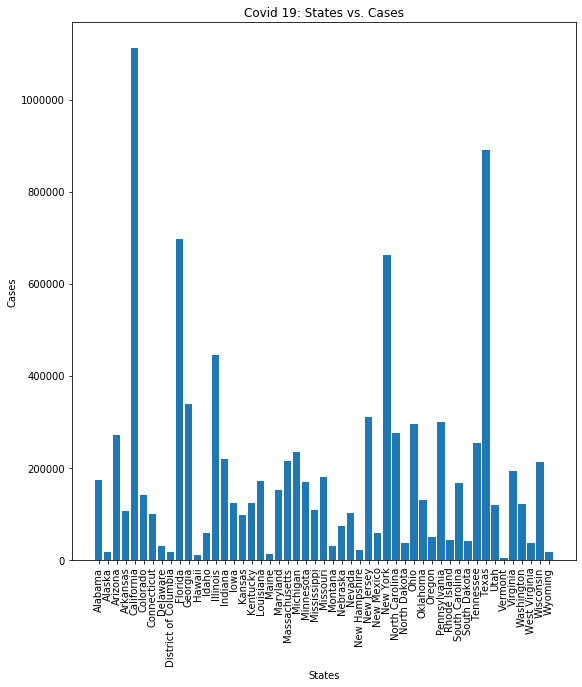

In [18]:
sample_df = summary_stats_df.sample(n=10, random_state=2)
print(sample_df)
x_axis=summary_stats_df["state"]
y_axis=summary_stats_df["Cases"]
plt.figure(figsize=(8,8))
plt.bar(x_axis,y_axis)
plt.tight_layout()
plt.title("Covid 19: States vs. Cases")
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Cases")
plt.show()

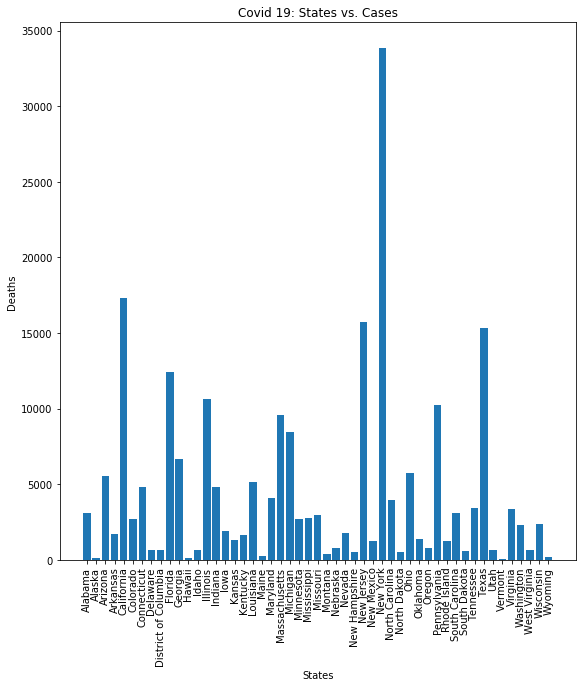

In [19]:
sample_df = summary_stats_df.sample(n=10, random_state=2)
x_axis=summary_stats_df["state"]
y_axis=summary_stats_df["Deaths"]
plt.figure(figsize=(8,8))
plt.bar(x_axis,y_axis)
plt.tight_layout()
plt.title("Covid 19: States vs. Cases")
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Deaths")
plt.show()

In [23]:
# There is a high correlation in the number of Covid 19 Cases to the number of Deaths. This means that there is a direct
# impact to the number of deaths as a result of Covid 19 infection cases.
# Based on the data, we can claim that there is a positive correlation between Cases vs. Deaths
# Further analysis will help to determine if there is covid impact/affect on anxiety (mental health).

In [20]:
#Create data frame for total number of cases and deaths as of 04/25/2021
covid_042521_df = covid_data.loc[covid_data["date"] =="4/25/2021", :]
covid_042521_df.head()

,date,state,cases,deaths
23004,4/25/2021,Alabama,526131,10851
23005,4/25/2021,Alaska,66518,318
23006,4/25/2021,Arizona,858737,17268
23007,4/25/2021,Arkansas,334706,5718
23008,4/25/2021,California,3731677,61434


In [21]:
# Sort the DataFrame by "deaths" in ascending order
covid_042521_df = covid_042521_df.sort_values("deaths")
covid_042521_df

,date,state,cases,deaths
23040,4/25/2021,Northern Mariana Islands,164,2
23053,4/25/2021,Virgin Islands,3068,27
23015,4/25/2021,Guam,8884,137
23052,4/25/2021,Vermont,22576,244
23005,4/25/2021,Alaska,66518,318
23016,4/25/2021,Hawaii,32284,475
23058,4/25/2021,Wyoming,57696,705
23024,4/25/2021,Maine,59776,772
23012,4/25/2021,District of Columbia,47323,1099
23034,4/25/2021,New Hampshire,93821,1284


In [22]:
# Calculate total deaths as of 04/25/2021
total_deaths_042521 = (covid_042521_df["deaths"]).sum()
total_deaths_042521_df = pd.DataFrame({"Total deaths from COVID-19 as of 04/25/2021 in US": [total_deaths_042521]})
total_deaths_042521_df

,Total deaths from COVID-19 as of 04/25/2021 in US
0,571753


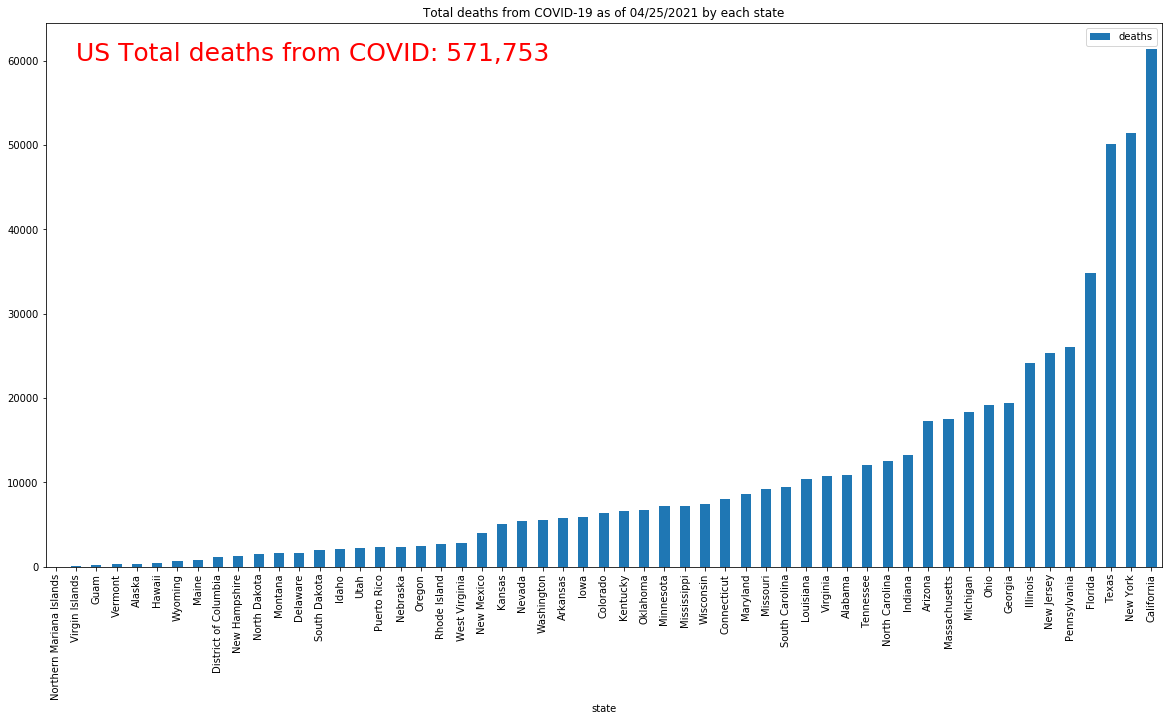

In [23]:
#Create chart for total deaths by each state as of 04/25/2021
chart_042521 = pd.DataFrame(covid_042521_df.groupby(["state"]).count()).reset_index()
chart_042521_df = covid_042521_df[["state", "deaths"]]
chart_042521_df = chart_042521_df.set_index("state")

chart_042521_df.plot(kind="bar", figsize=(20,10))
plt.title("Total deaths from COVID-19 as of 04/25/2021 by each state")
plt.annotate("US Total deaths from COVID: 571,753",(1,60000), fontsize=25, color="red")
plt.savefig('Images/US Total deaths from COVID-19 as of 04-25-2021.png')
plt.show()

In [24]:
#Added new colum for month to calculate average frequency by month
merged_data["date"]=pd.to_datetime(merged_data["date"], format='%m/%d/%Y')
merged_data["month"]=pd.DatetimeIndex(merged_data["date"]).month
display(merged_data)

,date,state,cases,deaths,mental disorder,frequency of mental disorder,month
0,2020-04-23,Alabama,5832,197,Symptoms of Depressive Disorder,18.6,4
1,2020-04-23,Alabama,5832,197,Symptoms of Anxiety Disorder,25.6,4
2,2020-04-23,Alabama,5832,197,Symptoms of Anxiety Disorder or Depressive Dis...,30.3,4
3,2020-04-23,Alaska,335,7,Symptoms of Depressive Disorder,19.2,4
4,2020-04-23,Alaska,335,7,Symptoms of Anxiety Disorder,27.7,4
...,...,...,...,...,...,...,...
4126,2021-03-17,Wisconsin,627266,7203,Symptoms of Anxiety Disorder,25.9,3
4127,2021-03-17,Wisconsin,627266,7203,Symptoms of Anxiety Disorder or Depressive Dis...,32.3,3
4128,2021-03-17,Wyoming,55449,693,Symptoms of Depressive Disorder,24.2,3
4129,2021-03-17,Wyoming,55449,693,Symptoms of Anxiety Disorder,30.1,3


In [25]:
#Calculate average frequency per month
month_groupby = merged_data.groupby(['month'])
avg_anx_month = month_groupby['frequency of mental disorder'].mean()
monthly_df = pd.DataFrame({"average frequency by month": avg_anx_month})
display(monthly_df) 

,average frequency by month
month,
1,34.342157
2,32.553595
3,30.043464
4,28.807190
5,28.411275
6,30.277614
7,33.571678
8,29.809804
9,30.486057


In [26]:
#Create data frame for monthly average US anxiety 
US_Anxiety_bymonth_df = pd.DataFrame({
    "Months" : ["April 2020", "May", "Jun", "July", "August", "September", "October", "November", "December", "January 2021", "February 2021", "March 2021"],
    "Frequency of mental disorder" :[34.34, 32.55, 30.04, 28.81, 28.41, 30.28, 33.57, 29.81, 30.49, 33.14, 35.36, 35.79]
})
display(US_Anxiety_bymonth_df)

,Months,Frequency of mental disorder
0,April 2020,34.34
1,May,32.55
2,Jun,30.04
3,July,28.81
4,August,28.41
5,September,30.28
6,October,33.57
7,November,29.81
8,December,30.49
9,January 2021,33.14


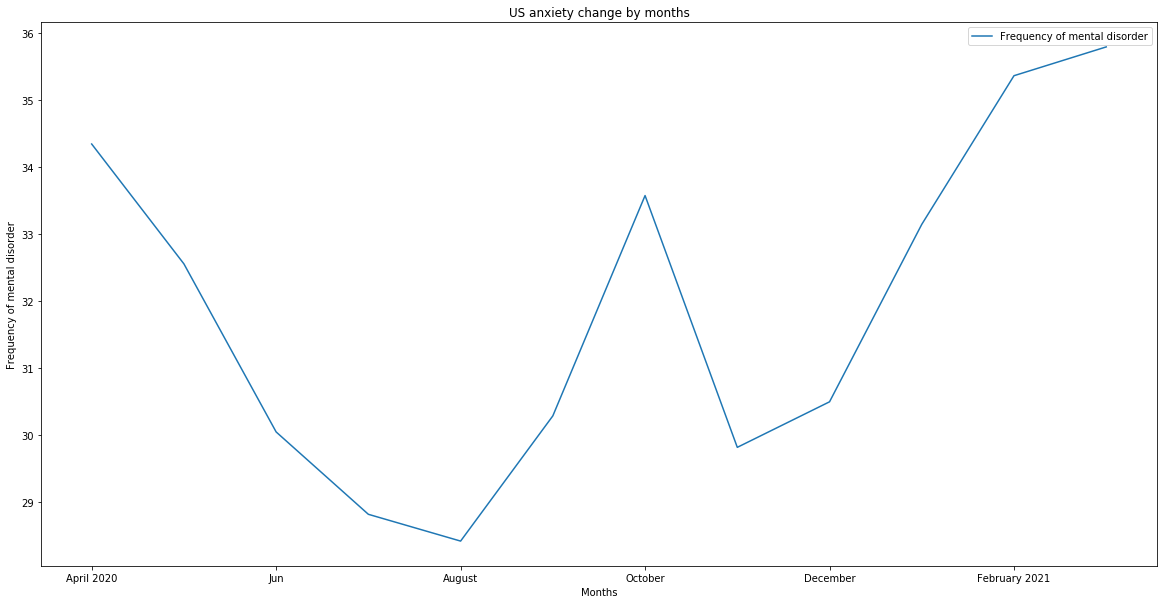

In [27]:
#Create chart for US anxiety change by months
chart_anx = pd.DataFrame(US_Anxiety_bymonth_df.groupby(["Months"]).count()).reset_index()
chart_anx_df = US_Anxiety_bymonth_df[["Months", "Frequency of mental disorder"]]
chart_anx_df = chart_anx_df.set_index("Months")

chart_anx_df.plot(kind="line", figsize=(20,10))
plt.title("US anxiety change by months")
plt.ylabel("Frequency of mental disorder")
plt.savefig('Images/US anxiety change by month.png')
plt.show()

In [28]:
#Added new colum for year to calculate average frequency by year
merged_data["year"]=pd.DatetimeIndex(merged_data["date"]).year
display(merged_data)


,date,state,cases,deaths,mental disorder,frequency of mental disorder,month,year
0,2020-04-23,Alabama,5832,197,Symptoms of Depressive Disorder,18.6,4,2020
1,2020-04-23,Alabama,5832,197,Symptoms of Anxiety Disorder,25.6,4,2020
2,2020-04-23,Alabama,5832,197,Symptoms of Anxiety Disorder or Depressive Dis...,30.3,4,2020
3,2020-04-23,Alaska,335,7,Symptoms of Depressive Disorder,19.2,4,2020
4,2020-04-23,Alaska,335,7,Symptoms of Anxiety Disorder,27.7,4,2020
...,...,...,...,...,...,...,...,...
4126,2021-03-17,Wisconsin,627266,7203,Symptoms of Anxiety Disorder,25.9,3,2021
4127,2021-03-17,Wisconsin,627266,7203,Symptoms of Anxiety Disorder or Depressive Dis...,32.3,3,2021
4128,2021-03-17,Wyoming,55449,693,Symptoms of Depressive Disorder,24.2,3,2021
4129,2021-03-17,Wyoming,55449,693,Symptoms of Anxiety Disorder,30.1,3,2021


In [29]:
#Group by year to calculate mean of frequency of mental disorder, mean of cases over US
yearly_grouped_data = merged_data.groupby(['year'])
yearly_mean_freq = round(yearly_grouped_data['frequency of mental disorder'].mean(),2)
yearly_mean_deaths = round(yearly_grouped_data['deaths'].mean(),2)
yearly_cases_vs_freq_df = pd.DataFrame({"Mean-freq of mental disorder":yearly_mean_freq,"Mean-covid deaths":yearly_mean_deaths}).reset_index()
yearly_cases_vs_freq_df

,year,Mean-freq of mental disorder,Mean-covid deaths
0,2020,31.35,3047.33
1,2021,32.31,8994.21


In [30]:
yearly_cases_vs_freq_df.columns

Index(['year', 'Mean-freq of mental disorder', 'Mean-covid deaths'], dtype='object')

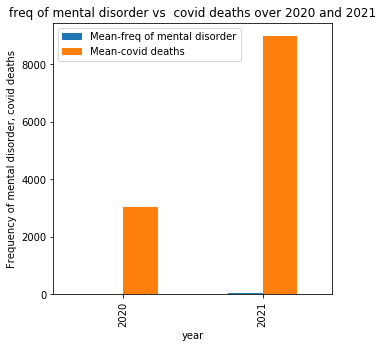

In [31]:
#Plot a bar graph to show how the change of cases affected freq of mental disorder over years 
yearly_cases_vs_freq_df.plot(x='year',y=['Mean-freq of mental disorder','Mean-covid deaths'], kind="bar", figsize=(5,5))
plt.title("freq of mental disorder vs  covid deaths over 2020 and 2021")
plt.xlabel('year')
plt.ylabel("Frequency of mental disorder, covid deaths")
plt.savefig('Images/US anxiety change by year.png')
plt.show()

The anxiety and depression levels of Americans remained almost the same during the pandemic with a slight increase over years as observed from the visualization

In [32]:
anx_data = merged_data
depression_df = anx_data[anx_data['mental disorder']=='Symptoms of Depressive Disorder']
anxiety_df = anx_data[anx_data['mental disorder']== 'Symptoms of Anxiety Disorder']
either_df = anx_data[anx_data['mental disorder']== 'Symptoms of Anxiety Disorder or Depressive Disorder']

depression = depression_df.groupby('state').mean()['frequency of mental disorder']
anxiety = anxiety_df.groupby('state').mean()['frequency of mental disorder']
either = either_df.groupby('state').mean()['frequency of mental disorder']
both = (depression+anxiety)-either

In [33]:
summary_stats_df = pd.DataFrame({"Cases": mean_cases, "Deaths":mean_deaths, "Anxiety":anxiety, "Depression":depression,
                                "Either Disorder":either, "Both Disorders":both})
summary_stats_df.head()

,Cases,Deaths,Anxiety,Depression,Either Disorder,Both Disorders
state,,,,,,
Alabama,1.739869e+05,3081.555556,32.307407,27.696296,37.485185,22.518519
Alaska,1.789378e+04,86.259259,31.914815,25.685185,37.314815,20.285185
Arizona,2.708545e+05,5512.000000,33.581481,27.933333,38.966667,22.548148
Arkansas,1.061795e+05,1719.148148,34.448148,28.896296,39.629630,23.714815
California,1.112002e+06,17291.148148,35.185185,28.518519,40.777778,22.925926


In [34]:
print('The total number of cases is '+str(round(summary_stats_df['Cases'].sum(),0))+'.')
print('The total number of deaths is '+str(round(summary_stats_df['Deaths'].sum(),0))+'.')
print('The average rate of anxiety is '+str(round(summary_stats_df['Anxiety'].mean(),2))+'.')
print('The averange rate of depression is '+str(round(summary_stats_df['Depression'].mean(),2))+'.')
print('The average rate of anxiety or depression symptoms '+str(round(summary_stats_df['Either Disorder'].mean(),2))+'.')
print('The average rate for both anxiety and depression symptoms is '+str(round(summary_stats_df['Both Disorders'].mean(),2))+'.')

The total number of cases is 9762136.0.
The total number of deaths is 222812.0.
The average rate of anxiety is 32.08.
The averange rate of depression is 25.63.
The average rate of anxiety or depression symptoms 36.98.
The average rate for both anxiety and depression symptoms is 20.72.


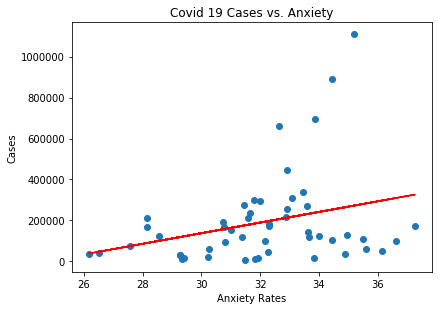

The r-value is: 0.08838834660185807


In [35]:
x_axis=summary_stats_df["Anxiety"]
y_axis=summary_stats_df["Cases"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.tight_layout()
plt.title("Covid 19 Cases vs. Anxiety")
plt.xlabel("Anxiety Rates")
plt.ylabel("Cases")
plt.show()
print(f"The r-value is: {rvalue**2}")

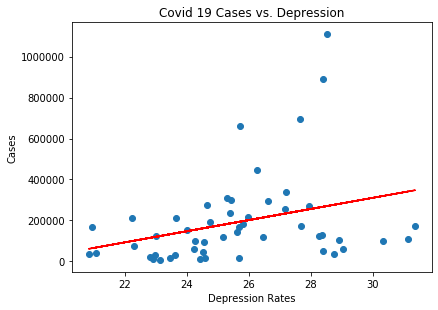

The r-value is: 0.09828985333616586


In [36]:
x_axis=summary_stats_df["Depression"]
y_axis=summary_stats_df["Cases"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.tight_layout()
plt.title("Covid 19 Cases vs. Depression")
plt.xlabel("Depression Rates")
plt.ylabel("Cases")
plt.show()
print(f"The r-value is: {rvalue**2}")

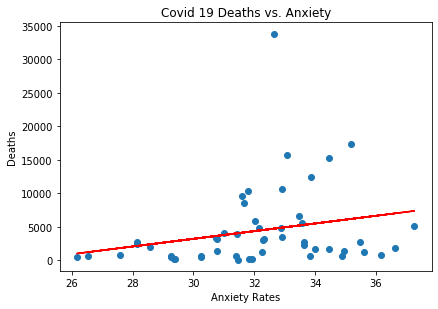

The r-value is: 0.058543384108705694


In [37]:
x_axis=summary_stats_df["Anxiety"]
y_axis=summary_stats_df["Deaths"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.tight_layout()
plt.title("Covid 19 Deaths vs. Anxiety")
plt.xlabel("Anxiety Rates")
plt.ylabel("Deaths")
plt.show()
print(f"The r-value is: {rvalue**2}")

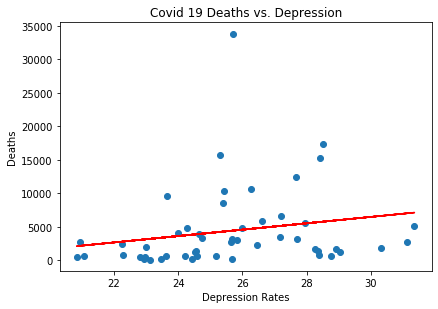

The r-value is: 0.04093693682134642


In [38]:
x_axis=summary_stats_df["Depression"]
y_axis=summary_stats_df["Deaths"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.tight_layout()
plt.title("Covid 19 Deaths vs. Depression")
plt.xlabel("Depression Rates")
plt.ylabel("Deaths")
plt.show()
print(f"The r-value is: {rvalue**2}")

In [455]:
#Hypothesis Test
#In 2019, the CDC reported that about 18.5 percent of US adults expired symptoms of depression. We are
#using 18.5% as our null hypothesis to test whether the there has been a mathmatically significant change 
#in depression rates during the pandemic.

M_new=summary_stats_df['Depression'].mean()
M_old=18.5
stan_dev=summary_stats_df['Depression'].std()
n=summary_stats_df['Depression'].count()

print('Ho:' + str(round(M_new,2)) + '<=' + str(M_old))
print('H1:' + str(round(M_new,2)) + '>' + str(M_old))

significance_level = .05

z_score=(M_new-M_old)/(stan_dev)


print('The z-score equals '+str(round(z_score,3)))
print('The significance level equals '+str(significance_level))
p=sts.norm.cdf(z_score)
print('The p-value equals '+str(round(1-p,3)))
print('Because the p-value '+str(round(1-p,3))+ ' is less than the significance level, we have significant evidence to reject the null hypothesis.')
print('With this analysis, we can say with '+str(1-significance_level)+' confidence that depression rates for Americans have been higher during the pandemic.')

Ho:25.63<=18.5
H1:25.63>18.5
The z-score equals 2.795
The significance level equals 0.05
The p-value equals 0.003
Because the p-value 0.003 is less than the significance level, we have significant evidence to reject the null hypothesis.
With this analysis, we can say with 0.95 confidence that depression rates for Americans have been higher during the pandemic.
